# ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png) **Trabajo Práctico 8: Árboles binarios de búsqueda** ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png)

En este trabajo práctico, vamos a trabajar con las estructuras de datos **Árbol binario de búsqueda** en Python. Para esta guía, los datos que guardaremos en los nodos son números enteros. Recuerden crear una copia de este archivo en su ***Google Drive*** para tener permisos de edición.

### Sergio: **sergio.gonzalez@unahur.edu.ar** ###

### **Ejercicio 1**

Implementar el TDA Árbol binario de búsqueda, con las siguientes operaciones:

En el Tipo NodoArbol:
- **\_\_init__():** Constructor.
- **Tiene hijo izquierdo**.
- **Tiene hijo derecho**.
- **Obtener grado**.
- **Es hoja**.
- **Predecesor de un nodo**: Retorna el nodo predecesor.
- **Sucesor de un nodo**: Retorna el nodo sucesor.
- **Altura de un nodo**: Retorna el largo de la trayectoria hasta la hoja mas lejana

En el Tipo ABB:
- **\_\_init__():** Constructor.
- **Vaciar**.
- **Esta vacio**.
- **Mostrar elementos en PreOrden**.
- **Mostrar elementos en InOrden:** Prueben que pasa si en lugar de ir primero al subarbol izquierdo y luego al subarbol derecho, van primero al derecho y luego al izquierdo.
- **Mostrar elementos en PostOrden**.
- **Insertar elemento:** Inserta nuevo nodo en el lugar que corresponde en el árbol con el elemento que recibe como parámetro.
- **Buscar elemento:** Recibe un elemento y retorna *True* si el elemento esta en el árbol y *False* en caso contrario.
- **Eliminar elemento:** Recibe un elemento y elimina el nodo que lo contiene.
- **Clonar**.
- **Obtener peso del arbol**.
- **Obtener máximo del arbol**.
- **Obtener mínimo del arbol**.
- **Obtener profundidad del árbol:** Altura de la raíz. Deben hacer una operación que calcule la altura de un nodo (del tipo NodoArbol).
- **Obtener profundidad de un elemento (Nivel):** Recibe un elemento y retorna su profundidad si el elemento esta en el árbol y *None* en caso contrario.




In [1]:
from graphviz import Digraph
import copy as cp

class ABB:
  def __init__(self):
    self.__raiz = None

  def estaVacio(self)->bool:
    return self.__raiz == None

  def vaciar(self)->None:
    self.__raiz = None

  def clonar(self):
    return cp.deepcopy(self)

  def treePlot(self, fileName='arbol')->None:
    if not self.estaVacio():
      treeDot = Digraph()
      treeDot.node(str(self.__raiz.dato), str(self.__raiz.dato))
      self.__raiz.treePlot(treeDot)
      treeDot.render(fileName, view=True)

  ##################################################################
  ##################################################################
  class __NodoArbol:
    def __init__(self, dato):
      self.dato = dato
      self.izquierdo = None
      self.derecho = None

    def tieneIzquierdo(self)->bool:
      return self.izquierdo != None

    def tieneDerecho(self)->bool:
      return self.derecho != None

    def grado(self)->int:
      cantHijos = 0
      if self.tieneIzquierdo(): cantHijos += 1
      if self.tieneDerecho(): cantHijos += 1
      return cantHijos

    def esHoja(self)->bool:
      return self.grado() == 0

    def treePlot(self, dot:Digraph)->None:
      if self.tieneIzquierdo():
        dot.node(str(self.izquierdo.dato), str(self.izquierdo.dato))
        dot.edge(str(self.dato), str(self.izquierdo.dato))
        self.izquierdo.treePlot(dot)
      else:
        dot.node("-"+str(self.dato)+"l", "-")
        dot.edge(str(self.dato), "-"+str(self.dato)+"l")
      if self.tieneDerecho():
        dot.node(str(self.derecho.dato), str(self.derecho.dato))
        dot.edge(str(self.dato), str(self.derecho.dato))
        self.derecho.treePlot(dot)
      else:
        dot.node("-"+str(self.dato)+"r", "-")
        dot.edge(str(self.dato), "-"+str(self.dato)+"r")

In [2]:
class ABB(ABB):
  def insertar(self, dato:int)->None:
    nodoNuevo = ABB.__NodoArbol(dato)
    if self.estaVacio():
      self.__raiz = nodoNuevo
    else:
      self.__raiz.insertarNodo(nodoNuevo)

  class __NodoArbol(ABB.__NodoArbol):
    def insertarNodo(self, nodoNuevo)->None:
      if nodoNuevo.dato < self.dato:
        #El nuevo nodo va a la izquierda de self
        if not self.tieneIzquierdo():
          self.izquierdo = nodoNuevo
        else:
          self.izquierdo.insertarNodo(nodoNuevo)
      elif nodoNuevo.dato > self.dato:
        #El nuevo nodo va a la derecha de self
        if not self.tieneDerecho():
          self.derecho = nodoNuevo
        else:
          self.derecho.insertarNodo(nodoNuevo)
      else:
        raise Exception("No se admiten datos repetidos")


In [ ]:
class ABB(ABB):
  def mostrarPreOrden(self)->None:
    if not self.estaVacio():
      self.__raiz.mostrarPreOrdenNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def mostrarPreOrdenNodo(self)->None:
      print(self.dato)
      if self.tieneIzquierdo():
        self.izquierdo.mostrarPreOrdenNodo()
      if self.tieneDerecho():
        self.derecho.mostrarPreOrdenNodo()

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)

arbol1.mostrarPreOrden()

50
40
30
45
60
55
70


In [ ]:
class ABB(ABB):
  def mostrarPostOrden(self)->None:
    if not self.estaVacio():
      self.__raiz.mostrarPostOrdenNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def mostrarPostOrdenNodo(self)->None:
      if self.tieneIzquierdo():
        self.izquierdo.mostrarPostOrdenNodo()
      if self.tieneDerecho():
        self.derecho.mostrarPostOrdenNodo()
      print(self.dato)

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)

arbol1.mostrarPostOrden()

30
45
40
55
70
60
50


In [ ]:
class ABB(ABB):
  def mostrarInOrden(self)->None:
    if not self.estaVacio():
      self.__raiz.mostrarInOrdenNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def mostrarInOrdenNodo(self)->None:
      if self.tieneDerecho():
        self.derecho.mostrarInOrdenNodo()
      print(self.dato)
      if self.tieneIzquierdo():
        self.izquierdo.mostrarInOrdenNodo()

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)

arbol1.mostrarInOrden()

70
60
55
50
45
40
30


In [ ]:
class ABB(ABB):
  def peso(self)->int:
    cantNodos = 0
    if not self.estaVacio():
      cantNodos = self.__raiz.pesoNodo()
    return cantNodos

  class __NodoArbol(ABB.__NodoArbol):
    def pesoNodo(self)->int:
      cantNodos = 1
      if self.tieneIzquierdo():
        cantNodos += self.izquierdo.pesoNodo() #Peso del subarbol izquierdo
      if self.tieneDerecho():
        cantNodos += self.derecho.pesoNodo() #Peso del subarbol derecho
      return cantNodos

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)

arbol1.peso()

7

In [ ]:
class ABB(ABB):
  def buscar(self, datoBusc)->bool:
    encontrado = False
    if not self.estaVacio():
      encontrado = self.__raiz.buscarNodo(datoBusc) != None
    return encontrado

  class __NodoArbol(ABB.__NodoArbol):
    def buscarNodo(self, datoBusc):
      #Si el datoBusc esta en el arbol retorna el nodo que lo contiene
      #Si el datoBusc NO estan en el arbol retorna None
      nodoDatoBusc = None
      if self.dato == datoBusc:
        nodoDatoBusc = self
      else:
        if datoBusc < self.dato:
          if self.tieneIzquierdo():
            nodoDatoBusc = self.izquierdo.buscarNodo(datoBusc)
        else: #datoBusc > self.dato
          if self.tieneDerecho():
            nodoDatoBusc = self.derecho.buscarNodo(datoBusc)
      return nodoDatoBusc

In [ ]:
class ABB(ABB):
  def profundidad(self)->int:
    profTotal = 0
    if not self.estaVacio():
      profTotal = self.__raiz.alturaNodo()
    return profTotal

  class __NodoArbol(ABB.__NodoArbol):
    def alturaNodo(self)->int:
      alturaIzq = 0
      alturaDer = 0
      alturaSelf = 0
      if not self.esHoja():
        if self.tieneIzquierdo():
          alturaIzq = self.izquierdo.alturaNodo()
        if self.tieneDerecho():
          alturaDer = self.derecho.alturaNodo()
        alturaSelf = 1 + max(alturaIzq, alturaDer)
      return alturaSelf

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)

arbol1.treePlot()
arbol1.profundidad()

2

In [ ]:
class ABB(ABB):
  def nivelDato(self, datoBusc)->int:
    nivelDatoBusc = None
    if not self.estaVacio():
      nivelDatoBusc = self.__raiz.nivelDatoNodo(datoBusc)
    return nivelDatoBusc

  class __NodoArbol(ABB.__NodoArbol):
    def nivelDatoNodo(self, datoBusc, nivelActual = 0)->int:
      nivelDatoBusc = None
      if self.dato == datoBusc:
        nivelDatoBusc = nivelActual
      elif self.dato > datoBusc:
        if self.tieneIzquierdo():
          nivelDatoBusc = self.izquierdo.nivelDatoNodo(datoBusc, nivelActual+1)
      else: #datoBusc > self.dato
        if self.tieneDerecho():
          nivelDatoBusc = self.derecho.nivelDatoNodo(datoBusc, nivelActual+1)
      return nivelDatoBusc

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

print(arbol1.nivelDato(47))

3


In [ ]:
class ABB(ABB):
  def maximo(self)->int: #Retorna el valor del maximo o None si self esta vacio
    datoMaximo = None
    if not self.estaVacio():
      datoMaximo = self.__raiz.maximoNodo().dato
    return datoMaximo
  def minimo(self)->int: #Retorna el valor del minimo o None si self esta vacio
    datoMinimo = None
    if not self.estaVacio():
      datoMinimo = self.__raiz.minimoNodo().dato
    return datoMinimo

  class __NodoArbol(ABB.__NodoArbol):
    def maximoNodo(self):#->ABB.__NodoArbol que contiene el valor maximo del
                                            #subarbol del cual self es la raiz
      nodoMaximo = self
      if self.tieneDerecho():
        nodoMaximo = self.derecho.maximoNodo()
      return nodoMaximo

    def minimoNodo(self):#->ABB.__NodoArbol que contiene el valor minimo del
                                            #subarbol del cual self es la raiz
      nodoMinimo = self
      if self.tieneIzquierdo():
        nodoMinimo = self.izquierdo.minimoNodo()
      return nodoMinimo

    def predecesor(self):#->ABB.__NodoArbol que contiene el valor maximo del subarbol izquierdo
      nodoPredecesor = None
      if self.tieneIzquierdo():
        nodoPredecesor = self.izquierdo.maximoNodo()
      return nodoPredecesor

    def sucesor(self):#->ABB.__NodoArbol que contiene el valor minimo del subarbol derecho
      nodoSucesor = None
      if self.tieneDerecho():
        nodoSucesor = self.derecho.minimoNodo()
      return nodoSucesor


In [ ]:
arbol1 = ABB()
for n in [63,28,87,16,54,79,96,8,18,50,58,80,6,11,27,29,20,38]:
  arbol1.insertar(n)
arbol1.treePlot()
print(arbol1.maximo())

96


In [ ]:
class ABB(ABB):
  def eliminar(self, datoDel:int)->None:
    if not self.estaVacio():
      if self.__raiz.dato == datoDel:
        nodoReemplazo = self.__raiz.predecesor()
        if nodoReemplazo==None: nodoReemplazo = self.__raiz.sucesor()
        if nodoReemplazo != None:
          self.__raiz.eliminarNodo(nodoReemplazo.dato)
          nodoReemplazo.izquierdo = self.__raiz.izquierdo
          nodoReemplazo.derecho = self.__raiz.derecho
        self.__raiz = nodoReemplazo
      else:
        self.__raiz.eliminarNodo(datoDel)

  class __NodoArbol(ABB.__NodoArbol):
    def buscarProgenitor(self, datoBusc:int):#->tuple[ABB.__NodoArbol, ABB.__NodoArbol, str]
                                                #[progenitor, hije, "izq"/"der"]
      nodoProgenitor = nodoHije = lado = None
      if datoBusc < self.dato:
        if self.tieneIzquierdo():
          if self.izquierdo.dato == datoBusc:
            nodoProgenitor = self
            nodoHije = self.izquierdo
            lado = "izq"
          else:
            nodoProgenitor, nodoHije, lado = self.izquierdo.buscarProgenitor(datoBusc)
      elif datoBusc > self.dato:
        if self.tieneDerecho():
          if self.derecho.dato == datoBusc:
            nodoProgenitor = self
            nodoHije = self.derecho
            lado = "der"
          else:
            nodoProgenitor, nodoHije, lado = self.derecho.buscarProgenitor(datoBusc)
      return nodoProgenitor, nodoHije, lado

    def eliminarNodo(self, datoDel:int)->None:
      nodoReemplazo = None
      nodoProgenitor, nodoAEliminar, lado = self.buscarProgenitor(datoDel)
      if nodoProgenitor != None:
        nodoReemplazo = nodoAEliminar.predecesor()
        if nodoReemplazo == None: nodoReemplazo = nodoAEliminar.sucesor()
        if nodoReemplazo != None:
          self.eliminarNodo(nodoReemplazo.dato)
          nodoReemplazo.izquierdo = nodoAEliminar.izquierdo
          nodoReemplazo.derecho = nodoAEliminar.derecho
        if lado == "izq":
          nodoProgenitor.izquierdo = nodoReemplazo
        elif lado == "der":
          nodoProgenitor.derecho = nodoReemplazo

### **Ejercicio 2**

Escribir una operación del TDA ABB que calcule la cantidad de hojas de un árbol.

In [ ]:
class ABB(ABB):
  def cantidadHojas(self)->int:
    cantidadHojas = 0
    if not self.estaVacio():
      cantidadHojas = self.__raiz.cantidadHojasNodo()
    return cantidadHojas

  class __NodoArbol(ABB.__NodoArbol):
    def cantidadHojasNodo(self):
      cantidad = 0
      if self.esHoja():
        cantidad += 1
      if self.tieneIzquierdo():
        cantidad += self.izquierdo.cantidadHojasNodo()
      if self.tieneDerecho():
        cantidad += self.derecho.cantidadHojasNodo()
      return cantidad

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)
arbol1.treePlot("nuevo")

arbol1.cantidadHojas()

4

### **Ejercicio 3**

Escribir una operación del TDA ABB que muestre los elementos que estan en el nivel N de un ABB, el nivel se recibe por parámetro.

In [ ]:
class ABB(ABB):
  def elementosEnNivel(self, nivelABuscar):
    elementos = str()
    if not self.estaVacio():
      elementos = self.__raiz.elementosEnNivelNodo(nivelABuscar)
    return elementos

  class __NodoArbol(ABB.__NodoArbol):
    def elementosEnNivelNodo(self, nivelABuscar, nivelActual = 0):
      elementos = str()
      if nivelABuscar == nivelActual: # caso base
        elementos += " " + str(self.dato)
      else:
        if self.tieneIzquierdo():
          elementos += self.izquierdo.elementosEnNivelNodo(nivelABuscar, nivelActual + 1)
        if self.tieneDerecho():
          elementos += self.derecho.elementosEnNivelNodo(nivelABuscar, nivelActual + 1)
      return elementos

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.elementosEnNivel(2)


' 30 45 55 70'

### **Ejercicio 4**

Se define por frontera de un árbol, la secuencia formada por los elementos almacenados en las hojas de un árbol, tomados de izquierda a derecha. Escribir una operación del TDA ABB, que imprima por pantalla la frontera del árbol.

In [ ]:
class ABB(ABB):
  def fronteraArbol(self)->int:
    hojas = 0
    if not self.estaVacio():
      hojas = self.__raiz.fronteraArbolNodo()
    return hojas

  class __NodoArbol(ABB.__NodoArbol):
    def fronteraArbolNodo(self):
      hojas = str()
      if self.esHoja():
        hojas = " " + str(self.dato)
      else:
        if self.tieneIzquierdo():
          hojas += self.izquierdo.fronteraArbolNodo()
        if self.tieneDerecho():
          hojas += self.derecho.fronteraArbolNodo()
      return hojas

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)
arbol1.treePlot("nuevo")

arbol1.fronteraArbol()

' 30 47 55 70'

### **Ejercicio 5**

Escribir una operación del TDA ABB que retorne una lista ordenada (de menor a mayor) con todos los números pares que forman parte del árbol.

In [ ]:
class ABB(ABB):
  def clavesParesOrdenadas(self)->list:
    listaClaves = []
    if not self.estaVacio():
      self.__raiz.clavesParesNodo(listaClaves)
    return listaClaves

  class __NodoArbol(ABB.__NodoArbol):
    def clavesParesNodo(self, lista)->None:
      #Recorro el subarbol izquierdo guardando los pares en la lista
      if self.tieneIzquierdo():
        lista = self.izquierdo.clavesParesNodo(lista)

      #Si el dato de self es par lo guardo en la lista
      if self.dato % 2 == 0:
        lista.append(self.dato)

      #Recorro el subarbol derecho guardando los pares en la lista
      if self.tieneDerecho():
        lista = self.derecho.clavesParesNodo(lista)
      return lista

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.clavesParesOrdenadas()

[30, 40, 50, 60, 70]

### **Ejercicio 6**

Escribir una operación del TDA ABB, que rote el árbol completo, es decir, los elementos del subárbol izquierdo deben ser mayores a la raíz y los del subárbol derecho menores (para todos los nodos del arbol). No se debe retornar un nuevo arbol, sino modificar el arbol desde el que se llama a la operación.

In [ ]:
#Intercambio los subarboles hijos (moviendo las referencias izquierdo y derecho)
#Rotar el subarbol derecho
#Rotar el subarbol izquierdo

class ABB(ABB):
  def rotarArbol(self):
    if not self.estaVacio():
      self.__raiz.rotarArbolNodo()

  class __NodoArbol(ABB.__NodoArbol):
    def rotarArbolNodo(self):
      datoDerecho = self.derecho
      datoIzquierdo = self.izquierdo

      if self.tieneDerecho() and self.tieneIzquierdo():
        self.derecho = datoIzquierdo
        self.izquierdo = datoDerecho
      if self.tieneDerecho():
        self.derecho.rotarArbolNodo()
      if self.tieneIzquierdo():
        self.izquierdo.rotarArbolNodo()

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)
arbol1.rotarArbol()
arbol1.treePlot('arbolRotado')

### **Ejercicio 7**

Escribir una operación del TDA ABB llamada **cantidadNodosEnNivel** que retorna la cantidad de nodos del arbol en un nivel determinado

In [ ]:
class ABB(ABB):
  def cantidadNodosEnNivel(self, nivel):
    nodos = 0
    if not self.estaVacio():
      nodos = self.__raiz.cantidadNodosEnNivel(nivel)
    return nodos

  class __NodoArbol(ABB.__NodoArbol):
    def cantidadNodosEnNivel(self, nivel, nivelActual = 0):
      nodos = 0
      if nivel == nivelActual:
        nodos = 1
      else:
        if self.tieneIzquierdo():
          nodos = self.izquierdo.cantidadNodosEnNivel(nivel, nivelActual + 1)
        if self.tieneDerecho():
          nodos += self.derecho.cantidadNodosEnNivel(nivel, nivelActual + 1)
      return nodos

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.cantidadNodosEnNivel(2)

4

## ***EJERCICIO PARCIAL***

### **EJERCICIO 1**
Escribir una operación del TDA ABB, que calcule el promedio de los valores acumulados en el árbol. La operación puede calcular dos promedios distintos en función del valor de un parámetro de entrada: el primero es el promedio de los valores almacenados solo en las hojas del árbol, el segundo, el promedio teniendo en cuenta todos los elementos del árbol. Especificar la estructura de datos del tipo ABB y del NodoArbol utilizados.

In [ ]:
class ABB(ABB):
  def sumaHojas(self)->int:
    totalHojas = 0
    if not self.estaVacio():
      totalHojas = self.__raiz.sumaHojasNodo()
    return totalHojas

  def sumaTotal(self)->int:
    totalNodos = 0
    if not self.estaVacio():
      totalNodos = self.__raiz.sumaTotalNodo()
    return totalNodos

  def cantHojas(self):
    cant = 0
    if not self.estaVacio():
      cant = self.__raiz.cantHojasNodo()
    return cant

  def pesoArbol(self):
    peso = 0
    if not self.estaVacio():
      peso = self.__raiz.pesoArbolNodo()
    return peso

  def promedio(self, tipo):
    promedio = 0
    if not self.estaVacio():
      if tipo == "hoja":
        promedio = self.sumaHojas() / self.cantHojas()
      elif tipo == "total":
        promedio = self.sumaTotal() / self.pesoArbol()
      else:
        raise Exception("tipo incorrecto")
    return promedio

  class __NodoArbol(ABB.__NodoArbol):
    def cantHojasNodo(self):
      cant = 0
      if self.esHoja():
        cant = 1
      if self.tieneIzquierdo():
        cant = self.izquierdo.cantHojasNodo()
      if self.tieneDerecho():
        cant += self.derecho.cantHojasNodo()
      return cant

    def pesoArbolNodo(self):
      peso = 1
      if self.tieneIzquierdo():
        peso += self.izquierdo.pesoArbolNodo()
      if self.tieneDerecho():
        peso += self.derecho.pesoArbolNodo()
      return peso

    def sumaHojasNodo(self):
      suma = 0
      if self.esHoja():
        suma = self.dato
      if self.tieneIzquierdo():
        suma = self.izquierdo.sumaHojasNodo()
      if self.tieneDerecho():
        suma += self.derecho.sumaHojasNodo()
      return suma

    def sumaTotalNodo(self):
      suma = self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaTotalNodo()
      if self.tieneDerecho():
        suma += self.derecho.sumaTotalNodo()
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.promedio("hoja")

50.5

### **Ejercicio 2**

Escribir la operación **sumaHastaNivel** del TDA ABB que recibe un nivel N por parámetro y retorna la suma de todos los números en el ABB en nodos que estén a nivel menor o igual a N. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo y tieneDerecho

In [ ]:
class ABB(ABB):
  def sumaHastaNivel(self, nivel):
    suma = 0
    if not self.estaVacio():
      suma = self.__raiz.sumaHastaNivelNodo(nivel)
    return suma

  class __NodoArbol(ABB.__NodoArbol):
    def sumaHastaNivelNodo(self, nivel, nivelActual = 0):
      suma = 0
      if nivelActual <= nivel:
        suma = self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaHastaNivelNodo(nivel, nivelActual + 1)
      if self.tieneDerecho():
        suma += self.derecho.sumaHastaNivelNodo(nivel, nivelActual + 1)
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.sumaHastaNivel(1)

150

### **Ejercicio 3**

Escribir la operación **sumaInternosMenores** del TDA ABB que devuelva la suma de los elementos de los nodos internos del árbol que son menores a un valor N que se recibe por parámetro. Definir la estructura del TDA ABB utilizado. La función puede hacer uso de las siguientes operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo, tieneDerecho y esHoja.

In [ ]:
class ABB(ABB):
  def sumaInternosMenores(self, valor):
    suma = 0
    if not self.estaVacio():
      suma = self.__raiz.sumaInternosMenores(valor)
    return suma

  class __NodoArbol(ABB.__NodoArbol):
    def sumaInternosMenores(self, dato):
      suma = 0
      if self.dato < dato and not self.esHoja():
        suma += self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaInternosMenores(dato)
      if self.tieneDerecho():
        suma += self.derecho.sumaInternosMenores(dato)
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)
arbol1.treePlot("nuevo")

arbol1.sumaInternosMenores(50)

85

### **Ejercicio 4**

Escribir la operación **obtenerHermano** del TDA ABB que recibe un número N y retorna el número del nodo hermano del nodo que contiene al número N. Dos nodos se definen como hermanos cuando tienen el mismo padre. Si el número N no está en el árbol o no tienen nodo hermano, la operación debe retornar None.


In [ ]:
class ABB(ABB):
  def obtenerHermano(self, numero):
    nodoHermano = None
    if not self.estaVacio() and self.__raiz.dato != numero:
      nodoHermano = self.__raiz.obtenerHermano(numero)
    return nodoHermano

  class __NodoArbol(ABB.__NodoArbol):
    def obtenerHermano(self, numero):
      nodoHermano = None
      if numero < self.dato:
        if self.tieneIzquierdo():
          if self.izquierdo.dato == numero:
            if self.tieneDerecho():
              nodoHermano = self.derecho.dato
          else:
              nodoHermano = self.izquierdo.obtenerHermano(numero)
      else:
        if self.tieneDerecho():
          if self.derecho.dato == numero:
            if self.tieneIzquierdo():
              nodoHermano = self.izquierdo.dato
          else:
              nodoHermano = self.derecho.obtenerHermano(numero)
      return nodoHermano

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.obtenerHermano(70)

55

### **Ejercicio 5**
Escribir la operación mayoresEnNivel del TDA ABB que recibe un nivel y un número N y retorna la cantidad de números que están a ese nivel en el árbol y que son mayores que N. Definir la estructura del TDA ABB utilizado.

In [ ]:

class ABB(ABB):
  def mayoresEnNivel(self, nivel, n):
    mayores = 0
    if not self.estaVacio():
      mayores = self.__raiz.mayoresEnNivelNodo(nivel, n)
    return mayores

  class __NodoArbol(ABB.__NodoArbol):
    def mayoresEnNivelNodo(self, nivel, n, nivelActual = 0):
      mayores = 0
      if self.dato > n and nivelActual == nivel:
        mayores = 1
      else:
        if self.tieneIzquierdo():
          mayores = self.izquierdo.mayoresEnNivelNodo(nivel, n, nivelActual + 1)
        if self.tieneDerecho():
          mayores += self.derecho.mayoresEnNivelNodo(nivel, n, nivelActual + 1)

      return mayores

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.mayoresEnNivel(2, 40)

3

### **Ejercicio 6**
Escribir la operacion **padresOcupados** del TDA ABB que retorna la cantidad de nodos en el arbol que poseen exactamente 2 hijos. La operacion puede hacer uso de las operaciones del TDA ABB: **estaVacio** y del TDA NodoArbol: **tieneIzquierdo** y **tieneDerecho**

Por ejemplo, para el siguiente ABB llamado arbol:

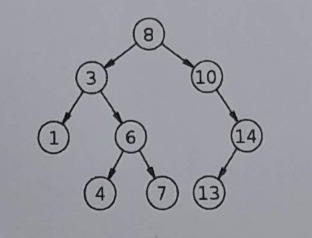

arbol.padresOcupados() = 3 (Los Nodos 8,3 y 6)

In [ ]:

class ABB(ABB):
  def padresOcupados(self):
    ocupados = 0
    if not self.estaVacio():
      ocupados = self.__raiz.padresOcupadosNodo()
    return ocupados

  class __NodoArbol(ABB.__NodoArbol):
    def grado(self)->int:
      cantHijos = 0
      if self.tieneIzquierdo():
        cantHijos += 1
      if self.tieneDerecho():
        cantHijos += 1
      return cantHijos

    def padresOcupadosNodo(self):
      ocupados = 0
      if self.grado() == 2:
        ocupados = 1
      if self.tieneIzquierdo():
        ocupados += self.izquierdo.padresOcupadosNodo()
      if self.tieneDerecho():
        ocupados += self.derecho.padresOcupadosNodo()

      return ocupados


arbol1 = ABB()
arbol1.insertar(8)
arbol1.insertar(3);arbol1.insertar(10);arbol1.insertar(1)
arbol1.insertar(6);arbol1.insertar(14);arbol1.insertar(13)
arbol1.insertar(4); arbol1.insertar(7)
arbol1.treePlot("ocupados")

arbol1.padresOcupados()

3

In [ ]:
class ABB(ABB):
  def buscarPadre(self, datoNodo):
    padre = None
    if not self.estaVacio() and datoNodo != self.__raiz.dato:
      padre = self.__raiz.buscarPadreNodo(datoNodo)
    return padre

  class __NodoArbol(ABB.__NodoArbol):
    def buscarPadreNodo(self, datoNodo):
      padre = None
      if datoNodo < self.dato:
        if self.tieneIzquierdo():
          if self.izquierdo.dato == datoNodo:
            padre = self.dato
          else:
            padre = self.izquierdo.buscarPadreNodo(datoNodo)
      else:
        if self.tieneDerecho():
          if self.derecho.dato == datoNodo:
            padre = self.dato
          else:
            padre = self.derecho.buscarPadreNodo(datoNodo)
      return padre

arbol1 = ABB()
arbol1.insertar(8)
arbol1.insertar(3);arbol1.insertar(10);arbol1.insertar(1)
arbol1.insertar(6);arbol1.insertar(14);arbol1.insertar(13)
arbol1.insertar(4); arbol1.insertar(7)

arbol1.buscarPadre(1)

3

In [ ]:
class ABB(ABB):
  def cantidadPares(self)->int:
    cantidad = 0
    if not self.estaVacio():
      cantidad = self.__raiz.cantidadParesNodo()
    return cantidad

  class __NodoArbol(ABB.__NodoArbol):
    def cantidadParesNodo(self):
      cantidad = 0
      if self.dato % 2 == 0:
        cantidad = 1
      if self.tieneIzquierdo():
        cantidad += self.izquierdo.cantidadParesNodo()
      if self.tieneDerecho():
        cantidad += self.derecho.cantidadParesNodo()
      return cantidad

arbol1 = ABB()
arbol1.insertar(8)
arbol1.insertar(3);arbol1.insertar(10);arbol1.insertar(1)
arbol1.insertar(6);arbol1.insertar(14);arbol1.insertar(13)
arbol1.insertar(4); arbol1.insertar(7)

arbol1.cantidadPares()

5

Escribir la operación balanceado del TDA ABB que determine si un árbol está balanceado. Un árbol está balanceado si para cada nodo, la diferencia de alturas entre sus subárboles izquierdo y derecho es como máximo 1.

In [ ]:
class ABB(ABB):
  def balanceado(self)->bool:
    balanceado = True
    if not self.estaVacio():
      balanceado = self.__raiz.balanceadoNodo()
    return balanceado

  class __NodoArbol(ABB.__NodoArbol):
    def balanceadoNodo(self) -> bool:
        balanceado = True
        balanceadoIzq = True
        balanceadoDer = True
        alturaIzq = 0
        alturaDer = 0

        if balanceado:
          # Verifica si hay un subárbol izquierdo y calcula su balance y altura
          if self.tieneIzquierdo():
              balanceadoIzq = self.izquierdo.balanceadoNodo()
              alturaIzq = self.izquierdo.alturaNodo()

          # Verifica si hay un subárbol derecho y calcula su balance y altura
          if self.tieneDerecho():
              balanceadoDer = self.derecho.balanceadoNodo()
              alturaDer = self.derecho.alturaNodo()

          balanceado = balanceadoIzq and balanceadoDer and (alturaIzq - alturaDer) <= 1
        # Verifica si ambos subárboles están balanceados y si la diferencia de altura es menor o igual a 1
        return balanceado

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47); arbol1.insertar(46)

arbol1.balanceado()

False

In [15]:
class ABB(ABB):
  def devolverArbolHojas(self):
    arbolHojas = ABB()
    if not self.estaVacio():
      self.__raiz.devolverArbolHojasNodo(arbolHojas)
    return arbolHojas

  class __NodoArbol(ABB.__NodoArbol):
    def devolverArbolHojasNodo(self, arbolHojas):
      if self.esHoja():
        arbolHojas.insertar(self.dato)
      if self.tieneIzquierdo():
        arbolHojas = self.izquierdo.devolverArbolHojasNodo(arbolHojas)
      if self.tieneDerecho():
        arbolHojas = self.derecho.devolverArbolHojasNodo(arbolHojas)
      return arbolHojas

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47); arbol1.insertar(46)

arbol1.devolverArbolHojas().treePlot('arbolHojas2')